In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

ill = pd.read_csv('Illinois_3.csv')
ill.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BorrID,LoanStatus,GrossApproval,SBAGuarantee,InterestRate,...,NaicsCode,NaicsDescription,JobsSupported,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,"MetalStamp, Inc.",24219 NORTHERN ILLINOIS DRIVE,CHANNAHON,IL,60410,6388,EXEMPT,1730000,1297500,5.75,...,332116,Metal Stamping,50,OTH 7A,Guaranty,First American Bank,700 Busse Rd,ELK GROVE VILLAGE,IL,60007
1,Phillip M. Palella D.D.S. P.C.,2033 W Division St,CHICAGO,IL,60622,10922,PIF,176600,88300,7.00,...,621210,Offices of Dentists,23,SBA EXPRES,FA$TRK (Small Loan Express),"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240
2,"PINOY TURO-TURO, INC",1800 FAXON DR,MONTGOMERY,IL,60538,98,CHGOFF,30500,15250,9.00,...,722110,Full-Service Restaurants,10,SBA EXPRES,FA$TRK (Small Loan Express),"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240
3,"TURNER BAILEY, INC.",410 BROADWAY,SOUTH ROXANA,IL,62037,164,CHGOFF,800000,600000,6.00,...,562910,Remediation Services,45,OTH 7A,Guaranty,Providence Bank,3855 Forum Blvd,COLUMBIA,MO,65203
4,KB TRUCK REPAIR INC.,3641 HIGHWAY 111,PONTOON BEACH,IL,62040,8691,PIF,505000,378750,6.00,...,811310,Commercial and Industrial Machinery and Equipm...,18,OTH 7A,Guaranty,United Community Bank,301 N Main St,CHATHAM,IL,62629


In [3]:
# ill =ill.dropna()

In [4]:
X = ill[["LoanStatus", "GrossApproval", "SBAGuarantee"]]
y = ill["NaicsCode"].values.reshape(-1, 1)
#COAmount
print(X.shape, y.shape)

(12274, 3) (12274, 1)


In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["LoanStatus"])
data_binary_encoded.head()

,GrossApproval,SBAGuarantee,LoanStatus_CHGOFF,LoanStatus_COMMIT,LoanStatus_EXEMPT,LoanStatus_PIF
0,1730000,1297500,0,0,1,0
1,176600,88300,0,0,0,1
2,30500,15250,1,0,0,0
3,800000,600000,1,0,0,0
4,505000,378750,0,0,0,1


In [12]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

X_train.head()

,GrossApproval,SBAGuarantee,LoanStatus_CHGOFF,LoanStatus_COMMIT,LoanStatus_EXEMPT,LoanStatus_PIF
10936,130000,65000,0,0,0,1
3482,150000,135000,0,0,1,0
1924,456000,342000,0,0,1,0
95,50000,25000,0,0,1,0
2975,250000,225000,0,0,1,0


In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [14]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [15]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["SBAGuarantee"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["SBAGuarantee"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

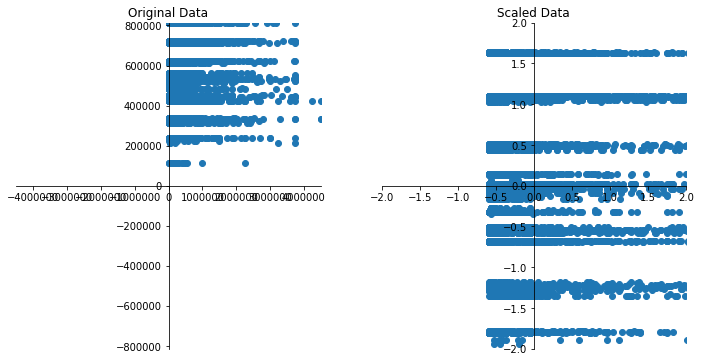

In [16]:
plt.show()

In [18]:
ill.corr()

,BorrZip,BorrID,GrossApproval,SBAGuarantee,InterestRate,TermMonths,ApprovalFiscalYear,Status,COFiscalYear,COAmount,PrinBalanceCollected,MonthsRemainingAtCO,NaicsCode,JobsSupported,BankZip
BorrZip,1.000000,-0.005902,-0.141156,-0.137055,-0.250071,-0.099949,-0.110992,-0.039812,-0.039817,-0.086324,-0.080460,-0.089174,-0.074988,-0.056258,0.251339
BorrID,-0.005902,1.000000,0.023433,0.028704,0.004489,0.030242,-0.480158,-0.571119,-0.571135,-0.440100,-0.384551,0.096579,0.003572,0.008969,0.110952
GrossApproval,-0.141156,0.023433,1.000000,0.999866,-0.588458,0.679097,0.150551,-0.337823,-0.337814,-0.156589,-0.144056,0.674645,-0.022419,0.503392,-0.052347
SBAGuarantee,-0.137055,0.028704,0.999866,1.000000,-0.587297,0.680251,0.137408,-0.334759,-0.334750,-0.152960,-0.140253,0.675311,-0.024162,0.499271,-0.045928
InterestRate,-0.250071,0.004489,-0.588458,-0.587297,1.000000,-0.498992,-0.147843,0.205519,0.205491,0.018900,0.004323,-0.488936,-0.141669,-0.418580,-0.317969
TermMonths,-0.099949,0.030242,0.679097,0.680251,-0.498992,1.000000,0.204937,-0.485194,-0.485205,-0.325104,-0.300350,0.994320,0.178496,0.131572,0.038777
ApprovalFiscalYear,-0.110992,-0.480158,0.150551,0.137408,-0.147843,0.204937,1.000000,-0.315629,-0.315595,-0.262969,-0.242116,0.231848,0.043794,0.028266,-0.161853
Status,-0.039812,-0.571119,-0.337823,-0.334759,0.205519,-0.485194,-0.315629,1.000000,1.000000,0.760643,0.667136,-0.575140,-0.190313,-0.175816,-0.044486
COFiscalYear,-0.039817,-0.571135,-0.337814,-0.334750,0.205491,-0.485205,-0.315595,1.000000,1.000000,0.760696,0.667205,-0.575151,-0.190334,-0.175815,-0.044523
COAmount,-0.086324,-0.440100,-0.156589,-0.152960,0.018900,-0.325104,-0.262969,0.760643,0.760696,1.000000,0.816578,-0.401197,-0.223807,-0.102722,-0.098576


In [12]:
X = pd.get_dummies(ill[["GrossApproval", "SBAGuarantee", "LoanStatus"]])
y = ill["COAmount"].values.reshape(-1, 1)
X.head()

,GrossApproval,SBAGuarantee,LoanStatus_CHGOFF,LoanStatus_COMMIT,LoanStatus_EXEMPT,LoanStatus_PIF
0,1730000,1297500,0,0,1,0
1,176600,88300,0,0,0,1
2,30500,15250,1,0,0,0
3,800000,600000,1,0,0,0
4,505000,378750,0,0,0,1


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

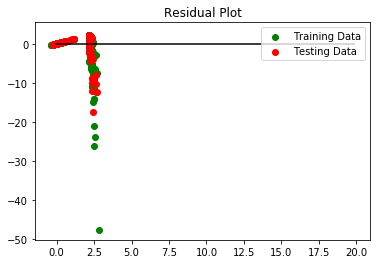

In [15]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="green", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5412227705935908, R2: 0.30673840730638524
